In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [ ]:
file_paths = {
    "2023-24": "/content/drive/MyDrive/Data Exploration/MPCE 2023-24.xlsx",
    "2022-23": "/content/drive/MyDrive/Data Exploration/MPCE 2022-23.xlsx",
    "2011-12": "/content/drive/MyDrive/Data Exploration/MPCE 2011-12.xlsx",
    "2009-10": "/content/drive/MyDrive/Data Exploration/MPCE 2009-10.xlsx",
    "2007-08": "/content/drive/MyDrive/Data Exploration/MPCE 2007-08.xlsx"
}

In [ ]:
dataframes = {}
for year, path in file_paths.items():
    dataframes[year] = pd.read_excel(path)

for year, df in dataframes.items():
    df.columns = df.iloc[0]
    dataframes[year] = df[1:]

combined_data = pd.DataFrame()
for year, df in dataframes.items():
    df["Year"] = year
    combined_data = pd.concat([combined_data, df])

numeric_columns = ["MPCE (Rs.) Rural", "MPCE (Rs.) Urban", "% share in total MPCE Rural", "% share in total MPCE Urban"]
for col in numeric_columns:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')

In [ ]:
combined_data

,Item group,MPCE (Rs.) Rural,MPCE (Rs.) Urban,% share in total MPCE Rural,% share in total MPCE Urban,Year,Monthly per capita exp. (Rs.) Rural,Monthly per capita exp. (Rs.) Urban,Percentage to total MPCE Rural,Percentage to total MPCE Urban
1,cereals & cereal substitutes,206.0,263.0,4.99,3.76,2023-24,NaN,NaN,NaN,NaN
2,pulses & their products*,84.0,98.0,2.04,1.40,2023-24,NaN,NaN,NaN,NaN
3,sugar & salt,37.0,40.0,0.89,0.57,2023-24,NaN,NaN,NaN,NaN
4,milk & milk products,348.0,503.0,8.44,7.19,2023-24,NaN,NaN,NaN,NaN
5,vegetables,248.0,288.0,6.03,4.12,2023-24,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19,rent,NaN,NaN,NaN,NaN,2007-08,3,86,0.4,5.9
20,taxes and cesses,NaN,NaN,NaN,NaN,2007-08,2,13,0.2,0.9
21,durable goods,NaN,NaN,NaN,NaN,2007-08,28,62,3.6,4.2
22,non-food total,NaN,NaN,NaN,NaN,2007-08,368,889,47.7,60.4


In [ ]:
dataframes = {}
for year, path in file_paths.items():
    try:
        dataframes[year] = pd.read_excel(path)
    except FileNotFoundError:
        print(f"File not found for year {year} at path {path}")
        continue

for year, df in dataframes.items():
    if not df.empty:
      try:
          df.columns = df.iloc[0]
          dataframes[year] = df[1:]
      except IndexError:
          print(f"Error processing file for year {year}. Skipping this file")
          continue

combined_data = pd.DataFrame()
for year, df in dataframes.items():
    if not df.empty:
        df["Year"] = year
        combined_data = pd.concat([combined_data, df], ignore_index=True)


numeric_columns = ["MPCE (Rs.) Rural", "MPCE (Rs.) Urban", "% share in total MPCE Rural", "% share in total MPCE Urban"]
for col in numeric_columns:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')


In [ ]:
combined_data

,Item group,MPCE (Rs.) Rural,MPCE (Rs.) Urban,% share in total MPCE Rural,% share in total MPCE Urban,Year,Monthly per capita exp. (Rs.) Rural,Monthly per capita exp. (Rs.) Urban,Percentage to total MPCE Rural,Percentage to total MPCE Urban
0,cereals & cereal substitutes,206.0,263.0,4.99,3.76,2023-24,NaN,NaN,NaN,NaN
1,pulses & their products*,84.0,98.0,2.04,1.40,2023-24,NaN,NaN,NaN,NaN
2,sugar & salt,37.0,40.0,0.89,0.57,2023-24,NaN,NaN,NaN,NaN
3,milk & milk products,348.0,503.0,8.44,7.19,2023-24,NaN,NaN,NaN,NaN
4,vegetables,248.0,288.0,6.03,4.12,2023-24,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
112,rent,NaN,NaN,NaN,NaN,2007-08,3,86,0.4,5.9
113,taxes and cesses,NaN,NaN,NaN,NaN,2007-08,2,13,0.2,0.9
114,durable goods,NaN,NaN,NaN,NaN,2007-08,28,62,3.6,4.2
115,non-food total,NaN,NaN,NaN,NaN,2007-08,368,889,47.7,60.4


#LINEAR REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

combined_data = combined_data.dropna(subset=["MPCE (Rs.) Rural", "MPCE (Rs.) Urban"])

features = combined_data[["Year", "Item group"]]
target_rural = combined_data["MPCE (Rs.) Rural"]
target_urban = combined_data["MPCE (Rs.) Urban"]

features_encoded = pd.get_dummies(features, columns=["Item group", "Year"], drop_first=True)

X_train_rural, X_test_rural, y_train_rural, y_test_rural = train_test_split(features_encoded, target_rural, test_size=0.2, random_state=42)

X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(features_encoded, target_urban, test_size=0.2, random_state=42)

linear_model_rural = LinearRegression()
linear_model_rural.fit(X_train_rural, y_train_rural)

linear_model_urban = LinearRegression()
linear_model_urban.fit(X_train_urban, y_train_urban)

predictions_rural_lr = linear_model_rural.predict(X_test_rural)
predictions_urban_lr = linear_model_urban.predict(X_test_urban)

X_test_original_rural = features.iloc[X_test_rural.index]
X_test_original_urban = features.iloc[X_test_urban.index]

results_rural = X_test_original_rural.copy()
results_rural["Predicted MPCE Rural"] = predictions_rural_lr

results_urban = X_test_original_urban.copy()
results_urban["Predicted MPCE Urban"] = predictions_urban_lr

print("Rural MPCE Predictions:")
for i in range(len(results_rural)):
    year_item_index = results_rural.index[i]
    year_item_row = combined_data.iloc[year_item_index]
    year = year_item_row['Year']
    item = year_item_row['Item group']
    predicted_value = results_rural.iloc[i]["Predicted MPCE Rural"]
    print(f"Year: {year}, Item: {item}, Predicted Rural MPCE: {predicted_value}")

print("\nUrban MPCE Predictions:")
for i in range(len(results_urban)):
    year_item_index = results_urban.index[i]
    year_item_row = combined_data.iloc[year_item_index]
    year = year_item_row['Year']
    item = year_item_row['Item group']
    predicted_value = results_urban.iloc[i]["Predicted MPCE Urban"]
    print(f"Year: {year}, Item: {item}, Predicted Urban MPCE: {predicted_value}")

mse_rural_lr = mean_squared_error(y_test_rural, predictions_rural_lr)
rmse_rural_lr = np.sqrt(mse_rural_lr)
mae_rural_lr = mean_absolute_error(y_test_rural, predictions_rural_lr)

mse_urban_lr = mean_squared_error(y_test_urban, predictions_urban_lr)
rmse_urban_lr = np.sqrt(mse_urban_lr)
mae_urban_lr = mean_absolute_error(y_test_urban, predictions_urban_lr)

print("\nPerformance Metrics for Rural MPCE (Linear Regression):")
print(f"Mean Squared Error (MSE): {mse_rural_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_rural_lr}")
print(f"Mean Absolute Error (MAE): {mae_rural_lr}")

print("\nPerformance Metrics for Urban MPCE (Linear Regression):")
print(f"Mean Squared Error (MSE): {mse_urban_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_urban_lr}")
print(f"Mean Absolute Error (MAE): {mae_urban_lr}")


Rural MPCE Predictions:
Year: 2022-23, Item: milk & milk products, Predicted Rural MPCE: 288.13333333333367
Year: 2022-23, Item: consumer services excluding conveyance, Predicted Rural MPCE: 157.13333333333458
Year: 2022-23, Item: sugar & salt, Predicted Rural MPCE: -22.86666666666406
Year: 2022-23, Item: taxes and cesses, Predicted Rural MPCE: 3917.566666666665
Year: 2022-23, Item: cereals & cereal substitutes, Predicted Rural MPCE: 146.13333333333412
Year: 2022-23, Item: education, Predicted Rural MPCE: 73.13333333333321
Year: 2023-24, Item: fuel and light, Predicted Rural MPCE: 310.86666666666406
Year: 2023-24, Item: taxes and cesses, Predicted Rural MPCE: 3977.433333333329
Year: 2023-24, Item: vegetables, Predicted Rural MPCE: 262.86666666666497
Year: 2022-23, Item: pulses & their products*, Predicted Rural MPCE: 24.13333333333594

Urban MPCE Predictions:
Year: 2022-23, Item: milk & milk products, Predicted Urban MPCE: 407.2000000000007
Year: 2022-23, Item: consumer services exclud

In [ ]:
features = combined_data[["Year", "Item group"]]
target_rural = combined_data["MPCE (Rs.) Rural"]
target_urban = combined_data["MPCE (Rs.) Urban"]

features_encoded = pd.get_dummies(features, columns=["Item group", "Year"], drop_first=True)

X_train_rural, X_test_rural, y_train_rural, y_test_rural = train_test_split(features_encoded, target_rural, test_size=0.2, random_state=42)
X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(features_encoded, target_urban, test_size=0.2, random_state=42)

linear_model_rural = LinearRegression()
linear_model_rural.fit(X_train_rural, y_train_rural)

linear_model_urban = LinearRegression()
linear_model_urban.fit(X_train_urban, y_train_urban)

missing_years_data = pd.DataFrame({
    'Item group_pulses': [1, 1],
    'Year_2019': [1, 0],
    'Year_2020': [0, 1]
})

for col in features_encoded.columns:
    if col not in missing_years_data.columns:
        missing_years_data[col] = 0

missing_years_data = missing_years_data[features_encoded.columns]

predictions_rural_missing_years = linear_model_rural.predict(missing_years_data)
predictions_urban_missing_years = linear_model_urban.predict(missing_years_data)

print("Predictions for Missing Years:")
for i in range(len(missing_years_data)):
    year = "2019" if i == 0 else "2020"
    print(f"Year: {year}, Predicted Rural MPCE: {predictions_rural_missing_years[i]}, Predicted Urban MPCE: {predictions_urban_missing_years[i]}")

mse_rural_lr = mean_squared_error(y_test_rural, linear_model_rural.predict(X_test_rural))
rmse_rural_lr = np.sqrt(mse_rural_lr)
mae_rural_lr = mean_absolute_error(y_test_rural, linear_model_rural.predict(X_test_rural))

mse_urban_lr = mean_squared_error(y_test_urban, linear_model_urban.predict(X_test_urban))
rmse_urban_lr = np.sqrt(mse_urban_lr)
mae_urban_lr = mean_absolute_error(y_test_urban, linear_model_urban.predict(X_test_urban))

print("\nPerformance Metrics for Rural MPCE (Linear Regression):")
print(f"Mean Squared Error (MSE): {mse_rural_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_rural_lr}")
print(f"Mean Absolute Error (MAE): {mae_rural_lr}")

print("\nPerformance Metrics for Urban MPCE (Linear Regression):")
print(f"Mean Squared Error (MSE): {mse_urban_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_urban_lr}")
print(f"Mean Absolute Error (MAE): {mae_urban_lr}")


Predictions for Missing Years:
Year: 2019, Predicted Rural MPCE: 3917.566666666665, Predicted Urban MPCE: 6679.599999999995
Year: 2020, Predicted Rural MPCE: 3917.566666666665, Predicted Urban MPCE: 6679.599999999995

Performance Metrics for Rural MPCE (Linear Regression):
Mean Squared Error (MSE): 3107245.1584444395
Root Mean Squared Error (RMSE): 1762.7379721457298
Mean Absolute Error (MAE): 821.5933333333317

Performance Metrics for Urban MPCE (Linear Regression):
Mean Squared Error (MSE): 9004658.223999983
Root Mean Squared Error (RMSE): 3000.776270234084
Mean Absolute Error (MAE): 1401.639999999997


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

combined_data = combined_data.dropna(subset=["MPCE (Rs.) Rural", "MPCE (Rs.) Urban"])

features = combined_data[["Year", "Item group"]]
target_rural = combined_data["MPCE (Rs.) Rural"]
target_urban = combined_data["MPCE (Rs.) Urban"]

features_encoded = pd.get_dummies(features, columns=["Item group", "Year"], drop_first=True)

X_train_rural, X_test_rural, y_train_rural, y_test_rural = train_test_split(features_encoded, target_rural, test_size=0.2, random_state=42)
X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(features_encoded, target_urban, test_size=0.2, random_state=42)

linear_model_rural = LinearRegression()
linear_model_rural.fit(X_train_rural, y_train_rural)

linear_model_urban = LinearRegression()
linear_model_urban.fit(X_train_urban, y_train_urban)

predictions_rural_lr = linear_model_rural.predict(X_test_rural)
predictions_urban_lr = linear_model_urban.predict(X_test_urban)

mse_rural_lr = mean_squared_error(y_test_rural, predictions_rural_lr)
rmse_rural_lr = np.sqrt(mse_rural_lr)
mae_rural_lr = mean_absolute_error(y_test_rural, predictions_rural_lr)
r2_rural_lr = r2_score(y_test_rural, predictions_rural_lr)

mse_urban_lr = mean_squared_error(y_test_urban, predictions_urban_lr)
rmse_urban_lr = np.sqrt(mse_urban_lr)
mae_urban_lr = mean_absolute_error(y_test_urban, predictions_urban_lr)
r2_urban_lr = r2_score(y_test_urban, predictions_urban_lr)

print("\nPerformance Metrics for Rural MPCE (Linear Regression):")
print(f"Mean Squared Error (MSE): {mse_rural_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_rural_lr}")
print(f"Mean Absolute Error (MAE): {mae_rural_lr}")
print(f"R-squared (R2): {r2_rural_lr}")

print("\nPerformance Metrics for Urban MPCE (Linear Regression):")
print(f"Mean Squared Error (MSE): {mse_urban_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_urban_lr}")
print(f"Mean Absolute Error (MAE): {mae_urban_lr}")
print(f"R-squared (R2): {r2_urban_lr}")



Performance Metrics for Rural MPCE (Linear Regression):
Mean Squared Error (MSE): 3107245.1584444395
Root Mean Squared Error (RMSE): 1762.7379721457298
Mean Absolute Error (MAE): 821.5933333333317
R-squared (R2): -282.0509112977721

Performance Metrics for Urban MPCE (Linear Regression):
Mean Squared Error (MSE): 9004658.223999983
Root Mean Squared Error (RMSE): 3000.776270234084
Mean Absolute Error (MAE): 1401.639999999997
R-squared (R2): -328.1532352915368


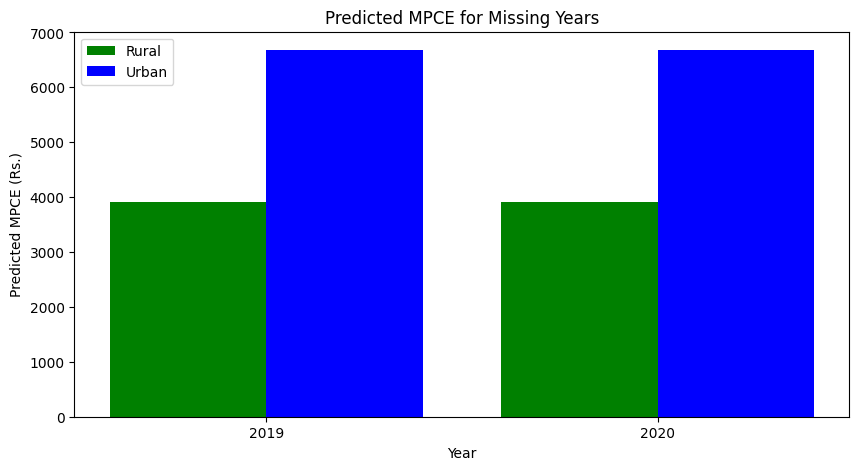

NameError: name 'ridge_model_rural' is not defined

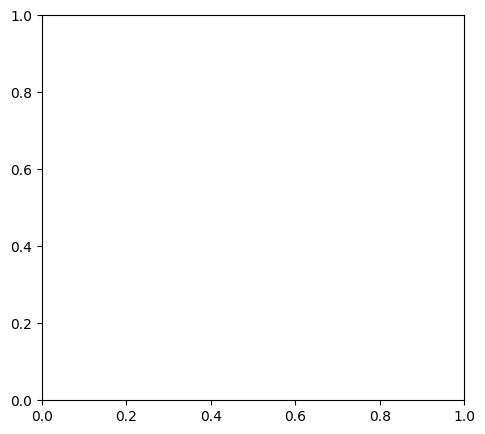

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

years = ['2019', '2020']
plt.figure(figsize=(10, 5))
plt.bar([x - 0.2 for x in range(len(years))], predictions_rural_missing_years, width=0.4, label='Rural', color='green')
plt.bar([x + 0.2 for x in range(len(years))], predictions_urban_missing_years, width=0.4, label='Urban', color='blue')
plt.xticks(range(len(years)), years)
plt.xlabel('Year')
plt.ylabel('Predicted MPCE (Rs.)')
plt.title('Predicted MPCE for Missing Years')
plt.legend()
plt.show()


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
rural_pred = ridge_model_rural.predict(X_test_scaled)
plt.scatter(y_test_rural, rural_pred, alpha=0.5, color='green')
plt.plot([y_test_rural.min(), y_test_rural.max()], [y_test_rural.min(), y_test_rural.max()], 'k--')
plt.xlabel('Actual Rural MPCE')
plt.ylabel('Predicted Rural MPCE')
plt.title('Rural: Actual vs Predicted')


plt.subplot(1, 2, 2)
urban_pred = ridge_model_urban.predict(X_test_scaled)
plt.scatter(y_test_urban, urban_pred, alpha=0.5, color='blue')
plt.plot([y_test_urban.min(), y_test_urban.max()], [y_test_urban.min(), y_test_urban.max()], 'k--')
plt.xlabel('Actual Urban MPCE')
plt.ylabel('Predicted Urban MPCE')
plt.title('Urban: Actual vs Predicted')

plt.tight_layout()
plt.show()


def plot_coefficients(model, title):
    coef = pd.Series(model.coef_, index=features_encoded.columns)
    important_coef = coef.sort_values().dropna()
    plt.figure(figsize=(10, 6))
    important_coef.plot(kind='barh')
    plt.title(f'Feature Importance - {title}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

plot_coefficients(ridge_model_rural, 'Rural MPCE')
plot_coefficients(ridge_model_urban, 'Urban MPCE')


metrics = ['MSE', 'RMSE', 'MAE']
rural_values = [mse_rural_ridge, rmse_rural_ridge, mae_rural_ridge]
urban_values = [mse_urban_ridge, rmse_urban_ridge, mae_urban_ridge]

x = range(len(metrics))
plt.figure(figsize=(10, 5))
plt.bar([i - 0.2 for i in x], rural_values, width=0.4, label='Rural', color='green')
plt.bar([i + 0.2 for i in x], urban_values, width=0.4, label='Urban', color='blue')
plt.xticks(x, metrics)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

print("\nPerformance Metrics for Rural MPCE (Ridge):")
print(f"Mean Squared Error (MSE): {mse_rural_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_rural_ridge}")
print(f"Mean Absolute Error (MAE): {mae_rural_ridge}")

print("\nPerformance Metrics for Urban MPCE (Ridge):")
print(f"Mean Squared Error (MSE): {mse_urban_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_urban_ridge}")
print(f"Mean Absolute Error (MAE): {mae_urban_ridge}")

#RIDGE REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare features and targets
features = combined_data[["Year", "Item group"]]
target_rural = combined_data["MPCE (Rs.) Rural"]
target_urban = combined_data["MPCE (Rs.) Urban"]

# One-hot encode categorical features
features_encoded = pd.get_dummies(features, columns=["Item group", "Year"], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train_rural, y_test_rural = train_test_split(features_encoded, target_rural, test_size=0.2, random_state=42)
_, _, y_train_urban, y_test_urban = train_test_split(features_encoded, target_urban, test_size=0.2, random_state=42)

# Handle NaN values in target variables before fitting
y_train_rural = y_train_rural.dropna()  # Remove rows with NaN in y_train_rural
y_train_urban = y_train_urban.dropna()  # Remove rows with NaN in y_train_urban

# Filter X_train to match the indices of the cleaned target variables
X_train = X_train.loc[y_train_rural.index] # For rural
#X_train = X_train.loc[y_train_urban.index] # For urban


# Now you can scale the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge regression models for rural and urban MPCE
ridge_model_rural = Ridge(alpha=1)
ridge_model_rural.fit(X_train_scaled, y_train_rural)

ridge_model_urban = Ridge(alpha=1)
ridge_model_urban.fit(X_train_scaled, y_train_urban) # Use the filtered X_train

# Predict missing years' MPCE values
missing_years_data = pd.DataFrame({
    'Item group_pulses': [1, 1],
    'Year_2019': [1, 0],
    'Year_2020': [0, 1]
})

for col in features_encoded.columns:
    if col not in missing_years_data.columns:
        missing_years_data[col] = 0

missing_years_data = missing_years_data[features_encoded.columns]
missing_years_scaled = scaler.transform(missing_years_data)

predictions_rural_missing_years = ridge_model_rural.predict(missing_years_scaled)
predictions_urban_missing_years = ridge_model_urban.predict(missing_years_scaled)

print("Predictions for Missing Years:")
for i in range(len(missing_years_data)):
    year = "2019" if i == 0 else "2020"
    print(f"Year: {year}, Predicted Rural MPCE: {predictions_rural_missing_years[i]}, Predicted Urban MPCE: {predictions_urban_missing_years[i]}")

# Evaluate model performance metrics
mse_rural_ridge = mean_squared_error(y_test_rural, ridge_model_rural.predict(X_test_scaled))
rmse_rural_ridge = np.sqrt(mse_rural_ridge)
mae_rural_ridge = mean_absolute_error(y_test_rural, ridge_model_rural.predict(X_test_scaled))
r2_rural_ridge = r2_score(y_test_rural, ridge_model_rural.predict(X_test_scaled))

mse_urban_ridge = mean_squared_error(y_test_urban, ridge_model_urban.predict(X_test_scaled))
rmse_urban_ridge = np.sqrt(mse_urban_ridge)
mae_urban_ridge = mean_absolute_error(y_test_urban, ridge_model_urban.predict(X_test_scaled))
r2_urban_ridge = r2_score(y_test_urban, ridge_model_urban.predict(X_test_scaled))

print("\nPerformance Metrics for Rural MPCE (Ridge):")
print(f"Mean Squared Error (MSE): {mse_rural_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_rural_ridge}")
print(f"Mean Absolute Error (MAE): {mae_rural_ridge}")
print(f"R-squared (R²): {r2_rural_ridge}")

print("\nPerformance Metrics for Urban MPCE (Ridge):")
print(f"Mean Squared Error (MSE): {mse_urban_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_urban_ridge}")
print(f"Mean Absolute Error (MAE): {mae_urban_ridge}")
print(f"R-squared (R²): {r2_urban_ridge}")

# Visualize performance metrics using bar charts
metrics_labels = ["MSE", "RMSE", "MAE", "R-squared"]
metrics_rural = [mse_rural_ridge, rmse_rural_ridge, mae_rural_ridge, r2_rural_ridge]
metrics_urban = [mse_urban_ridge, rmse_urban_ridge, mae_urban_ridge, r2_urban_ridge]

x_pos = range(len(metrics_labels))

plt.figure(figsize=(12, 6))
plt.bar(x_pos, metrics_rural, width=0.4, label="Rural MPCE", align='center', color='skyblue')
plt.bar([p + 0.4 for p in x_pos], metrics_urban, width=0.4, label="Urban MPCE", align='center', color='lightgreen')
plt.xticks([p + 0.2 for p in x_pos], metrics_labels)
plt.title("Performance Metrics Comparison")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(axis='y')
plt.show()

Predictions for Missing Years:
Year: 2019, Predicted Rural MPCE: 2850.653511840127, Predicted Urban MPCE: 4859.154502731591
Year: 2020, Predicted Rural MPCE: 2850.653511840127, Predicted Urban MPCE: 4859.154502731591


ValueError: Input contains NaN.

In [ ]:
import matplotlib.pyplot as plt

# Predictions for missing years
missing_years = ["2019", "2020"]
predictions_rural_missing_years = [value1, value2]  # Replace with actual prediction values
predictions_urban_missing_years = [value3, value4]  # Replace with actual prediction values

plt.figure(figsize=(10, 5))
plt.plot(missing_years, predictions_rural_missing_years, label="Predicted Rural MPCE", marker='o', color='blue')
plt.plot(missing_years, predictions_urban_missing_years, label="Predicted Urban MPCE", marker='o', color='green')
plt.title("Predictions for Missing Years")
plt.xlabel("Year")
plt.ylabel("Predicted MPCE (Rs.)")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'value1' is not defined

In [ ]:

metrics_rural = [mse_rural_ridge, rmse_rural_ridge, mae_rural_ridge]
metrics_labels = ["MSE", "RMSE", "MAE"]

plt.figure(figsize=(10, 5))
plt.bar(metrics_labels, metrics_rural, color='skyblue')
plt.title("Performance Metrics for Rural MPCE (Ridge)")
plt.ylabel("Error Value")
plt.grid(axis='y')
plt.show()


NameError: name 'mse_rural_ridge' is not defined

In [ ]:
metrics_urban = [mse_urban_ridge, rmse_urban_ridge, mae_urban_ridge]

plt.figure(figsize=(10, 5))
plt.bar(metrics_labels, metrics_urban, color='lightgreen')
plt.title("Performance Metrics for Urban MPCE (Ridge)")
plt.ylabel("Error Value")
plt.grid(axis='y')
plt.show()


#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model_rural = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_rural.fit(X_train, y_train_rural)

rf_model_urban = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_urban.fit(X_train, y_train_urban)

predictions_rural_rf = rf_model_rural.predict(X_test)
predictions_urban_rf = rf_model_urban.predict(X_test)

for i in range(len(predictions_rural_rf)):
    year_item_index = X_test.iloc[i].name
    year_item_row = combined_data.iloc[year_item_index]
    year = year_item_row['Year']
    item = year_item_row['Item group']

    print(f"Year: {year}, Item: {item}")
    print(f"Predicted Rural MPCE: {predictions_rural_rf[i]}")
    print(f"Predicted Urban MPCE: {predictions_urban_rf[i]}")
    print("-" * 20)


Year: 2022-23, Item: pulses
Predicted Rural MPCE: 232.26
Predicted Urban MPCE: 269.01
--------------------


Rural MPCE Predictions:
      Year Item group  Predicted MPCE Rural
1  2022-23     pulses                232.26

Urban MPCE Predictions:
      Year Item group  Predicted MPCE Urban
1  2022-23     pulses                269.01


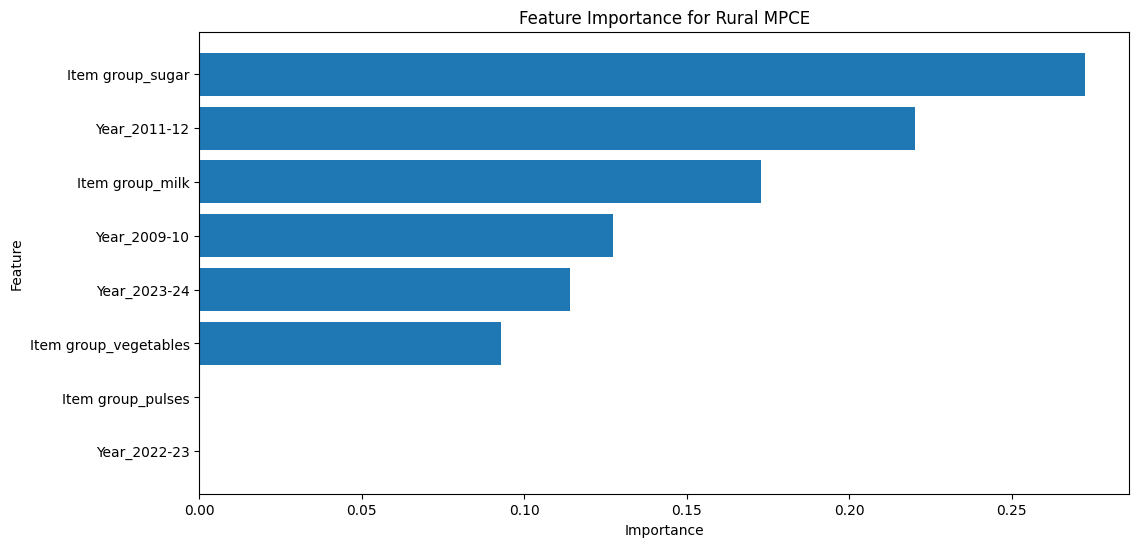

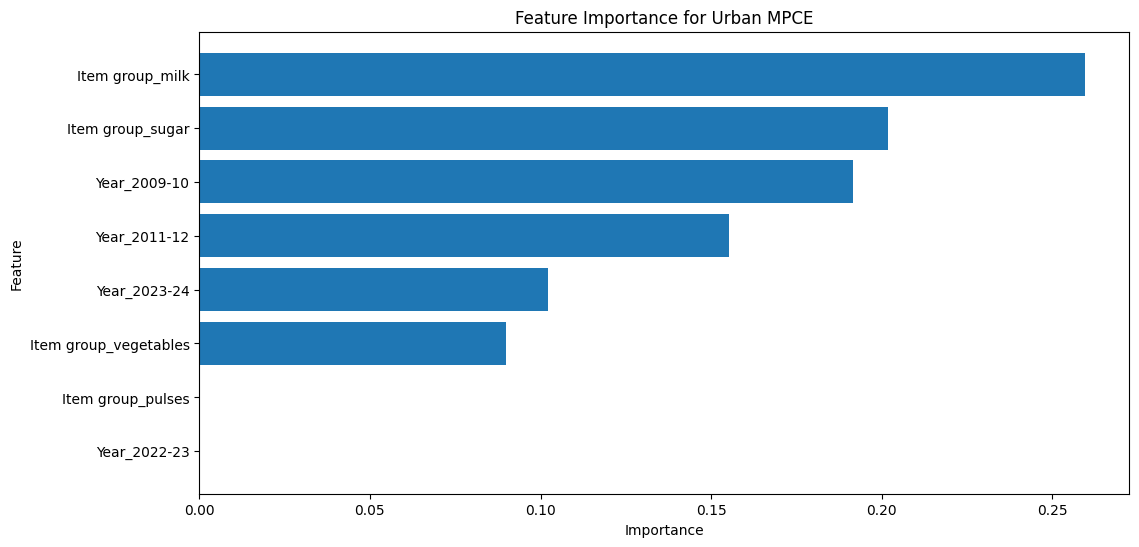

RMSE for Rural MPCE (Random Forest): 148.26
RMSE for Urban MPCE (Random Forest): 171.01


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

combined_data = combined_data.dropna(subset=["MPCE (Rs.) Rural", "MPCE (Rs.) Urban"])

features = combined_data[["Year", "Item group"]]
target_rural = combined_data["MPCE (Rs.) Rural"]
target_urban = combined_data["MPCE (Rs.) Urban"]

features_encoded = pd.get_dummies(features, columns=["Item group", "Year"], drop_first=True)

X_train_rural, X_test_rural, y_train_rural, y_test_rural = train_test_split(features_encoded, target_rural, test_size=0.2, random_state=42)
X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(features_encoded, target_urban, test_size=0.2, random_state=42)

rf_model_rural = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_rural.fit(X_train_rural, y_train_rural)

rf_model_urban = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_urban.fit(X_train_urban, y_train_urban)

predictions_rural_rf = rf_model_rural.predict(X_test_rural)
predictions_urban_rf = rf_model_urban.predict(X_test_urban)

X_test_original = features.iloc[X_test_rural.index]

results_rural = X_test_original.copy()
results_rural["Predicted MPCE Rural"] = predictions_rural_rf

results_urban = X_test_original.copy()
results_urban["Predicted MPCE Urban"] = predictions_urban_rf

print("Rural MPCE Predictions:")
print(results_rural)

print("\nUrban MPCE Predictions:")
print(results_urban)

feature_importances_rural = rf_model_rural.feature_importances_
feature_importances_df_rural = pd.DataFrame({
    'Feature': features_encoded.columns,
    'Importance': feature_importances_rural
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df_rural['Feature'], feature_importances_df_rural['Importance'])
plt.title("Feature Importance for Rural MPCE")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

feature_importances_urban = rf_model_urban.feature_importances_
feature_importances_df_urban = pd.DataFrame({
    'Feature': features_encoded.columns,
    'Importance': feature_importances_urban
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df_urban['Feature'], feature_importances_df_urban['Importance'])
plt.title("Feature Importance for Urban MPCE")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

from sklearn.metrics import mean_squared_error

mse_rural_rf = mean_squared_error(y_test_rural, predictions_rural_rf)
rmse_rural_rf = np.sqrt(mse_rural_rf)
print(f"RMSE for Rural MPCE (Random Forest): {rmse_rural_rf}")

mse_urban_rf = mean_squared_error(y_test_urban, predictions_urban_rf)
rmse_urban_rf = np.sqrt(mse_urban_rf)
print(f"RMSE for Urban MPCE (Random Forest): {rmse_urban_rf}")


#KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


features = combined_data[["Year", "Item group"]]
target_rural = combined_data["MPCE (Rs.) Rural"]
target_urban = combined_data["MPCE (Rs.) Urban"]

features_encoded = pd.get_dummies(features, columns=["Item group", "Year"], drop_first=True)

X_train_rural, X_test_rural, y_train_rural, y_test_rural = train_test_split(features_encoded, target_rural, test_size=0.2, random_state=42)

X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(features_encoded, target_urban, test_size=0.2, random_state=42)

knn_model_rural = KNeighborsRegressor(n_neighbors=3)
knn_model_rural.fit(X_train_rural, y_train_rural)

knn_model_urban = KNeighborsRegressor(n_neighbors=3)
knn_model_urban.fit(X_train_urban, y_train_urban)

predictions_rural_knn = knn_model_rural.predict(X_test_rural)
predictions_urban_knn = knn_model_urban.predict(X_test_urban)

missing_years_data = pd.DataFrame({
    'Item group_pulses': [1, 1],
    'Year_2019': [1, 0],
    'Year_2020': [0, 1]
})

for col in features_encoded.columns:
    if col not in missing_years_data.columns:
        missing_years_data[col] = 0

missing_years_data = missing_years_data[features_encoded.columns]

predictions_rural_missing_years_knn = knn_model_rural.predict(missing_years_data)
predictions_urban_missing_years_knn = knn_model_urban.predict(missing_years_data)

print("Predictions for Missing Years:")
for i in range(len(missing_years_data)):
    year = "2019" if i == 0 else "2020"
    print(f"Year: {year}, Predicted Rural MPCE: {predictions_rural_missing_years_knn[i]}, Predicted Urban MPCE: {predictions_urban_missing_years_knn[i]}")

mse_rural_knn = mean_squared_error(y_test_rural, predictions_rural_knn)
rmse_rural_knn = np.sqrt(mse_rural_knn)
mae_rural_knn = mean_absolute_error(y_test_rural, predictions_rural_knn)

mse_urban_knn = mean_squared_error(y_test_urban, predictions_urban_knn)
rmse_urban_knn = np.sqrt(mse_urban_knn)
mae_urban_knn = mean_absolute_error(y_test_urban, predictions_urban_knn)

print("\nPerformance Metrics for Rural MPCE (KNN):")
print(f"Mean Squared Error (MSE): {mse_rural_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_rural_knn}")
print(f"Mean Absolute Error (MAE): {mae_rural_knn}")

print("\nPerformance Metrics for Urban MPCE (KNN):")
print(f"Mean Squared Error (MSE): {mse_urban_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_urban_knn}")
print(f"Mean Absolute Error (MAE): {mae_urban_knn}")


Predictions for Missing Years:
Year: 2019, Predicted Rural MPCE: 1439.3333333333333, Predicted Urban MPCE: 2492.3333333333335
Year: 2020, Predicted Rural MPCE: 1439.3333333333333, Predicted Urban MPCE: 2492.3333333333335

Performance Metrics for Rural MPCE (KNN):
Mean Squared Error (MSE): 1687367.1444444444
Root Mean Squared Error (RMSE): 1298.986968542966
Mean Absolute Error (MAE): 1295.5666666666668

Performance Metrics for Urban MPCE (KNN):
Mean Squared Error (MSE): 4962493.68888889
Root Mean Squared Error (RMSE): 2227.665524464768
Mean Absolute Error (MAE): 2222.8


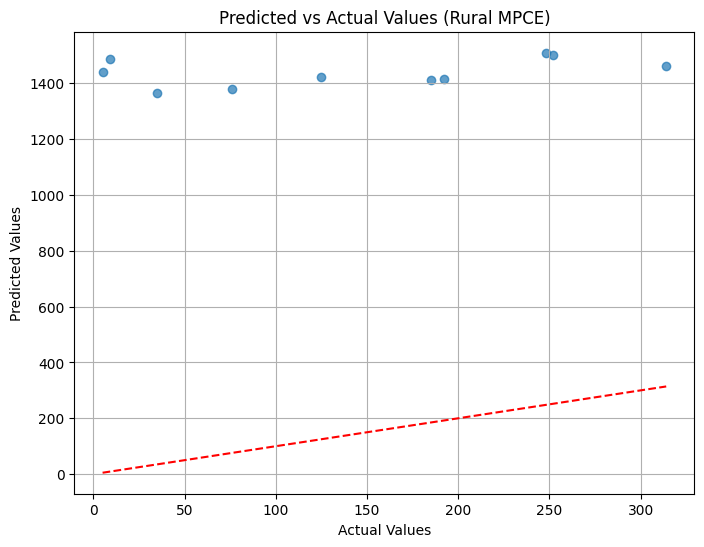

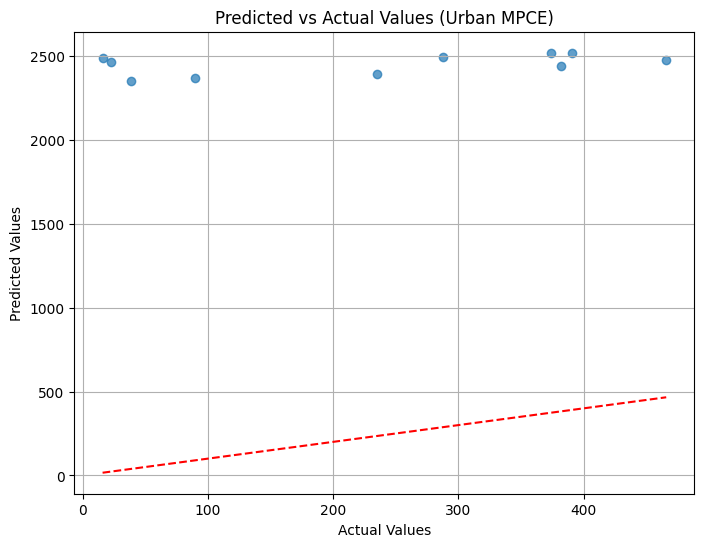

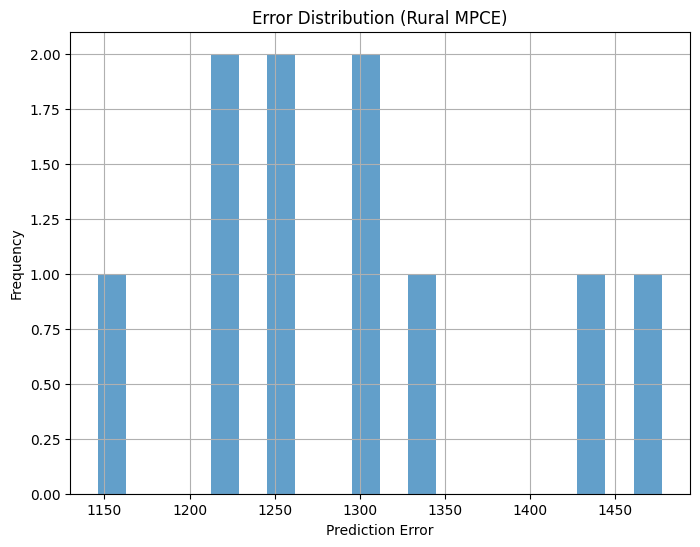

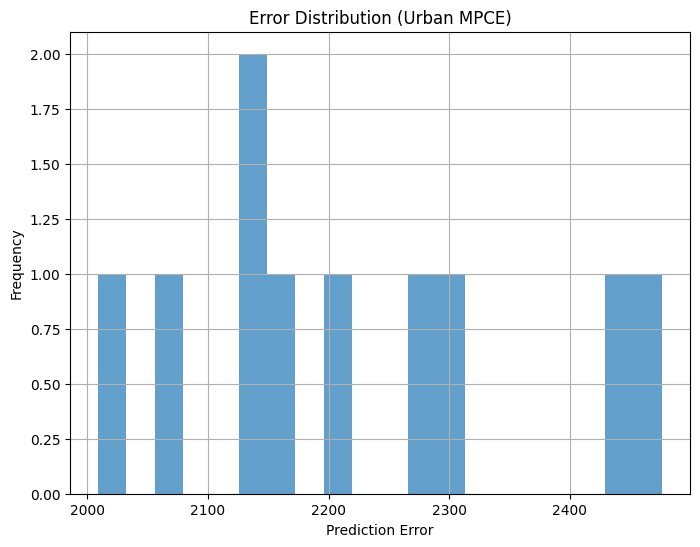

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rural, predictions_rural_knn, alpha=0.7)
plt.plot([y_test_rural.min(), y_test_rural.max()], [y_test_rural.min(), y_test_rural.max()], 'r--')
plt.title("Predicted vs Actual Values (Rural MPCE)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_urban, predictions_urban_knn, alpha=0.7)
plt.plot([y_test_urban.min(), y_test_urban.max()], [y_test_urban.min(), y_test_urban.max()], 'r--')
plt.title("Predicted vs Actual Values (Urban MPCE)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

errors_rural = predictions_rural_knn - y_test_rural.values
plt.figure(figsize=(8, 6))
plt.hist(errors_rural, bins=20, alpha=0.7)
plt.title("Error Distribution (Rural MPCE)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid()
plt.show()

errors_urban = predictions_urban_knn - y_test_urban.values
plt.figure(figsize=(8, 6))
plt.hist(errors_urban, bins=20, alpha=0.7)
plt.title("Error Distribution (Urban MPCE)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid()
plt.show()

TIME SERIES

Debugging to ensure datais properly loaded

In [ ]:
combined_data_grouped = combined_data[combined_data["Item group"] == "pulses"]
time_series_data_rural = combined_data_grouped.groupby("Year")["MPCE (Rs.) Rural"].mean().reset_index()
time_series_data_rural.columns = ["ds", "y"]
time_series_data_rural["ds"] = pd.to_datetime(time_series_data_rural["ds"], format="%Y-%y")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')

In [ ]:
combined_data['Year'] = pd.to_datetime(combined_data['Year'].str[:4])
combined_data.set_index('Year', inplace=True)


In [ ]:
combined_data.set_index

<bound method DataFrame.set_index of 0                             Item group  MPCE (Rs.) Rural  MPCE (Rs.) Urban  \
Year                                                                           
2023-01-01  cereals & cereal substitutes             206.0             263.0   
2023-01-01      pulses & their products*              84.0              98.0   
2023-01-01                  sugar & salt              37.0              40.0   
2023-01-01          milk & milk products             348.0             503.0   
2023-01-01                    vegetables             248.0             288.0   
...                                  ...               ...               ...   
2007-01-01                          rent               NaN               NaN   
2007-01-01              taxes and cesses               NaN               NaN   
2007-01-01                 durable goods               NaN               NaN   
2007-01-01                non-food total               NaN               NaN   
2007-01-01                     all items               NaN               NaN   

0           % share in total MPCE Rural  % share in total MPCE Urban  \
Year                                                                   
2023-01-01                         4.99                         3.76   
2023-01-01                         2.04                         1.40   
2023-01-01                         0.89                         0.57   
2023-01-01                         8.44                         7.19   
2023-01-01                         6.03                         4.12   
...                                 ...                          ...   
2007-01-01                          NaN                          NaN   
2007-01-01                          NaN                          NaN   
2007-01-01                          NaN                          NaN   
2007-01-01                          NaN                          NaN   
2007-01-01                          NaN                          NaN   

0          Monthly per capita exp. (Rs.) Rural  \
Year                                             
2023-01-01                                 NaN   
2023-01-01                                 NaN   
2023-01-01                                 NaN   
2023-01-01                                 NaN   
2023-01-01                                 NaN   
...                                        ...   
2007-01-01                                   3   
2007-01-01                                   2   
2007-01-01                                  28   
2007-01-01                                 368   
2007-01-01                                 772   

0          Monthly per capita exp. (Rs.) Urban Percentage to total MPCE Rural  \
Year                                                                            
2023-01-01                                 NaN                            NaN   
2023-01-01                                 NaN                            NaN   
2023-01-01                                 NaN                            NaN   
2023-01-01                                 NaN                            NaN   
2023-01-01                                 NaN                            NaN   
...                                        ...                            ...   
2007-01-01                                  86                            0.4   
2007-01-01                                  13                            0.2   
2007-01-01                                  62                            3.6   
2007-01-01                                 889                           47.7   
2007-01-01                                1472                            100   

0          Percentage to total MPCE Urban  
Year                                       
2023-01-01                            NaN  
2023-01-01                            NaN  
2023-01-01                            NaN  
2023-01-01                            NaN  
2023-01-01      

In [ ]:
combined_data

,Item group,MPCE (Rs.) Rural,MPCE (Rs.) Urban,% share in total MPCE Rural,% share in total MPCE Urban,Monthly per capita exp. (Rs.) Rural,Monthly per capita exp. (Rs.) Urban,Percentage to total MPCE Rural,Percentage to total MPCE Urban
Year,,,,,,,,,
2023-01-01,cereals & cereal substitutes,206.0,263.0,4.99,3.76,NaN,NaN,NaN,NaN
2023-01-01,pulses & their products*,84.0,98.0,2.04,1.40,NaN,NaN,NaN,NaN
2023-01-01,sugar & salt,37.0,40.0,0.89,0.57,NaN,NaN,NaN,NaN
2023-01-01,milk & milk products,348.0,503.0,8.44,7.19,NaN,NaN,NaN,NaN
2023-01-01,vegetables,248.0,288.0,6.03,4.12,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2007-01-01,rent,NaN,NaN,NaN,NaN,3,86,0.4,5.9
2007-01-01,taxes and cesses,NaN,NaN,NaN,NaN,2,13,0.2,0.9
2007-01-01,durable goods,NaN,NaN,NaN,NaN,28,62,3.6,4.2


1. Time Series Exploration

In [ ]:
def plot_time_series(data, cols, title):
    plt.figure(figsize=(14, 8))
    for col in cols:
        plt.plot(data.index, data[col], label=col)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('MPCE (Rs.)')
    plt.legend()
    plt.grid(True)
    plt.show()

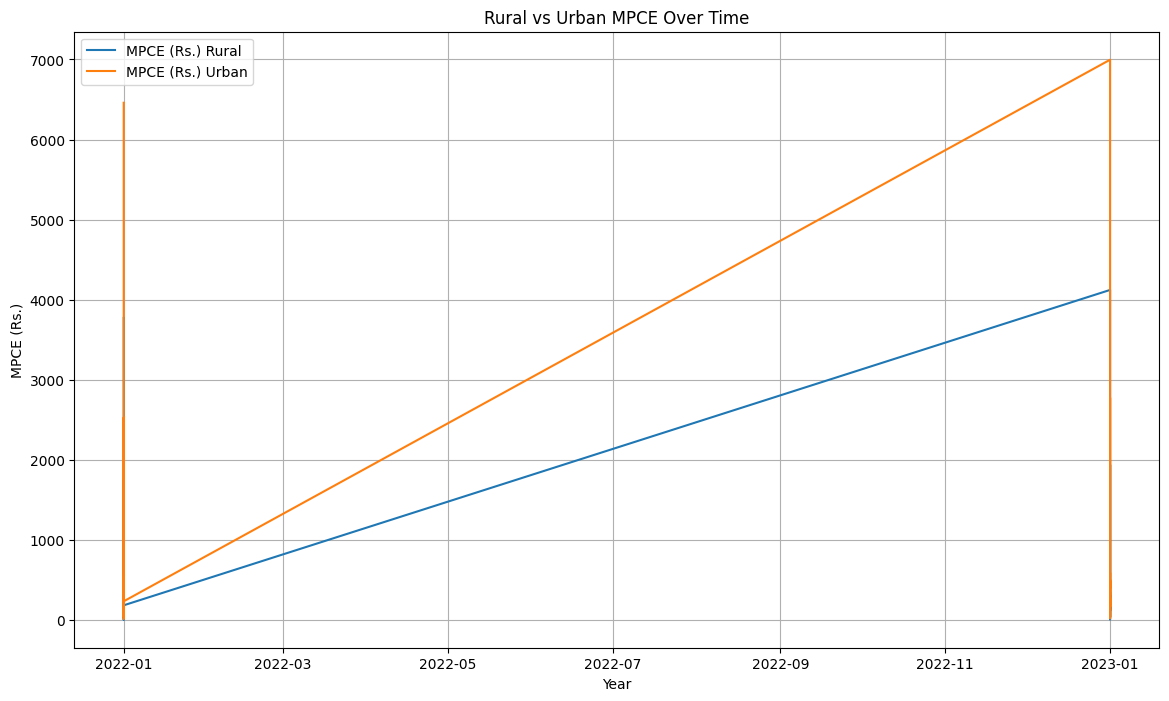

In [ ]:
plot_time_series(combined_data, ['MPCE (Rs.) Rural', 'MPCE (Rs.) Urban'],
                'Rural vs Urban MPCE Over Time')


2. Seasonal Decomposition

In [ ]:
def decompose_series(series, period=5, model='additive'):
    result = seasonal_decompose(series, model=model, period=period)
    fig = result.plot()
    fig.set_size_inches(12, 8)
    plt.show()
    return result


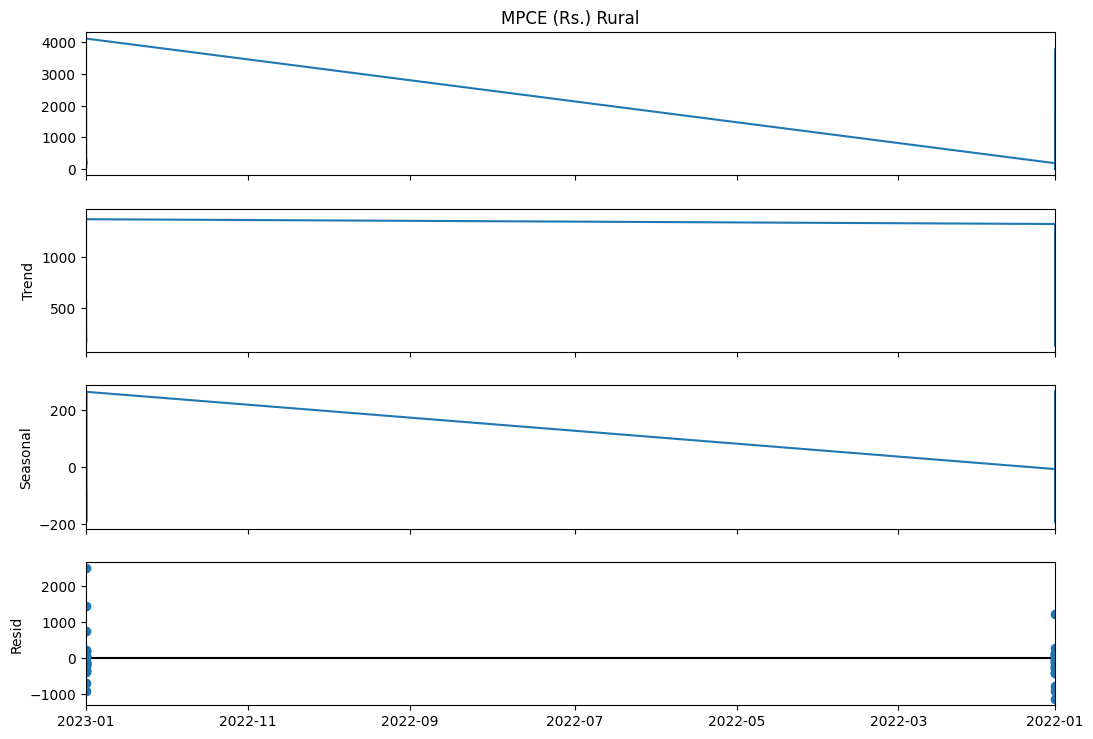

In [ ]:
rural_series = combined_data['MPCE (Rs.) Rural'].dropna()
decompose_series(rural_series)


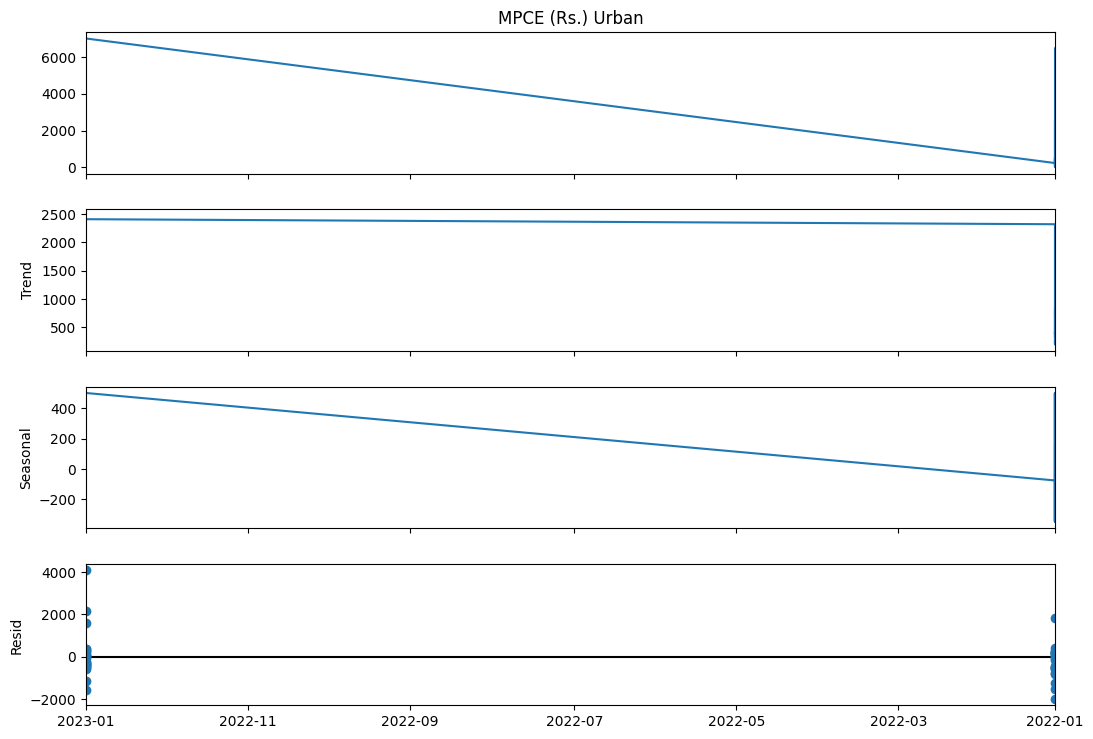

In [ ]:
urban_series = combined_data['MPCE (Rs.) Urban'].dropna()
decompose_series(urban_series)

#3. Time Series Forecasting

In [ ]:
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return y_pred, mse, mae


In [ ]:
n_steps = 3
X_rural, y_rural = prepare_data(rural_series.values, n_steps)
train_size = int(len(X_rural) * 0.8)
X_train_rural, X_test_rural = X_rural[:train_size], X_rural[train_size:]
y_train_rural, y_test_rural = y_rural[:train_size], y_rural[train_size:]


In [ ]:
X_urban, y_urban = prepare_data(urban_series.values, n_steps)
train_size = int(len(X_urban) * 0.8)
X_train_urban, X_test_urban = X_urban[:train_size], X_urban[train_size:]
y_train_urban, y_test_urban = y_urban[:train_size], y_urban[train_size:]

#4. ARIMA Model

In [ ]:
def fit_arima(series):
    model = ARIMA(series, order=(1,1,1))
    model_fit = model.fit()
    return model_fit

arima_rural = fit_arima(rural_series)
arima_urban = fit_arima(urban_series)

# Forecast next 2 years (2010-2011)

In [ ]:
forecast_steps = 2
arima_rural_forecast = arima_rural.forecast(steps=forecast_steps)
arima_urban_forecast = arima_urban.forecast(steps=forecast_steps)

# 5. SARIMA Model


In [ ]:
def fit_sarima(series):
    model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,5))
    model_fit = model.fit(disp=False)
    return model_fit

sarima_rural = fit_sarima(rural_series)
sarima_urban = fit_sarima(urban_series)

sarima_rural_forecast = sarima_rural.forecast(steps=forecast_steps)
sarima_urban_forecast = sarima_urban.forecast(steps=forecast_steps)

# 6. LSTM Model

In [ ]:
def build_lstm_model(n_steps):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

scaler = MinMaxScaler()
X_train_rural_scaled = scaler.fit_transform(X_train_rural.reshape(-1, n_steps))
X_test_rural_scaled = scaler.transform(X_test_rural.reshape(-1, n_steps))
y_train_rural_scaled = scaler.fit_transform(y_train_rural.reshape(-1, 1))
y_test_rural_scaled = scaler.transform(y_test_rural.reshape(-1, 1))

X_train_urban_scaled = scaler.fit_transform(X_train_urban.reshape(-1, n_steps))
X_test_urban_scaled = scaler.transform(X_test_urban.reshape(-1, n_steps))
y_train_urban_scaled = scaler.fit_transform(y_train_urban.reshape(-1, 1))
y_test_urban_scaled = scaler.transform(y_test_urban.reshape(-1, 1))


X_train_rural_scaled = X_train_rural_scaled.reshape((X_train_rural_scaled.shape[0], X_train_rural_scaled.shape[1], 1))
X_test_rural_scaled = X_test_rural_scaled.reshape((X_test_rural_scaled.shape[0], X_test_rural_scaled.shape[1], 1))
X_train_urban_scaled = X_train_urban_scaled.reshape((X_train_urban_scaled.shape[0], X_train_urban_scaled.shape[1], 1))
X_test_urban_scaled = X_test_urban_scaled.reshape((X_test_urban_scaled.shape[0], X_test_urban_scaled.shape[1], 1))


lstm_rural = build_lstm_model(n_steps)
lstm_rural.fit(X_train_rural_scaled, y_train_rural_scaled, epochs=200, verbose=0)

lstm_urban = build_lstm_model(n_steps)
lstm_urban.fit(X_train_urban_scaled, y_train_urban_scaled, epochs=200, verbose=0)


lstm_rural_pred = lstm_rural.predict(X_test_rural_scaled)
lstm_urban_pred = lstm_urban.predict(X_test_urban_scaled)


lstm_rural_pred = scaler.inverse_transform(lstm_rural_pred)
lstm_urban_pred = scaler.inverse_transform(lstm_urban_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


# 7. Compare Models and Forecast Missing Years

In [ ]:
print("Forecasted Values for Missing Years:")
print("\nARIMA Model:")
print(f"Rural MPCE Forecast: {arima_rural_forecast}")
print(f"Urban MPCE Forecast: {arima_urban_forecast}")

Forecasted Values for Missing Years:

ARIMA Model:
Rural MPCE Forecast: 48    2093.708619
49    1287.501152
Name: predicted_mean, dtype: float64
Urban MPCE Forecast: 48    3950.876687
49    2583.583338
Name: predicted_mean, dtype: float64


In [ ]:
print("\nSARIMA Model:")
print(f"Rural MPCE Forecast: {sarima_rural_forecast}")
print(f"Urban MPCE Forecast: {sarima_urban_forecast}")


SARIMA Model:
Rural MPCE Forecast: 48    2512.391078
49    1574.170295
Name: predicted_mean, dtype: float64
Urban MPCE Forecast: 48    4595.423830
49    3012.276675
Name: predicted_mean, dtype: float64


In [ ]:
def lstm_forecast(model, series, n_steps, forecast_steps):
    forecasts = []
    current_batch = series[-n_steps:].reshape(1, n_steps, 1)

    for i in range(forecast_steps):
        current_pred = model.predict(current_batch)[0]
        forecasts.append(current_pred[0])
        current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

    return scaler.inverse_transform(np.array(forecasts).reshape(-1, 1)).flatten()

lstm_rural_forecast = lstm_forecast(lstm_rural, rural_series.values, n_steps, forecast_steps)
lstm_urban_forecast = lstm_forecast(lstm_urban, urban_series.values, n_steps, forecast_steps)

print("\nLSTM Model:")
print(f"Rural MPCE Forecast: {lstm_rural_forecast}")
print(f"Urban MPCE Forecast: {lstm_urban_forecast}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

LSTM Model:
Rural MPCE Forecast: [-12863336. -12909960.]
Urban MPCE Forecast: [ -1918298.8 -38657708. ]


# 8. Visualization of Forecasts

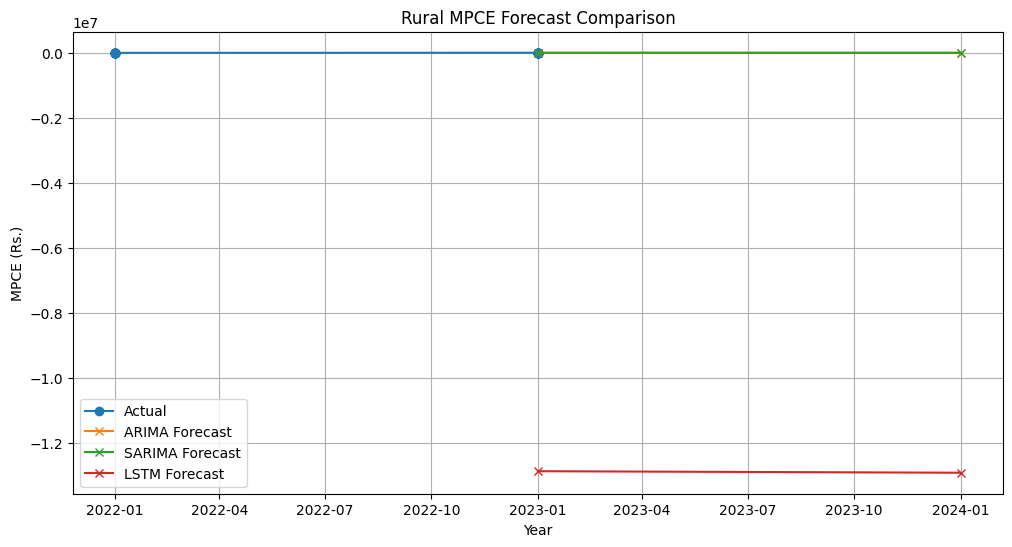

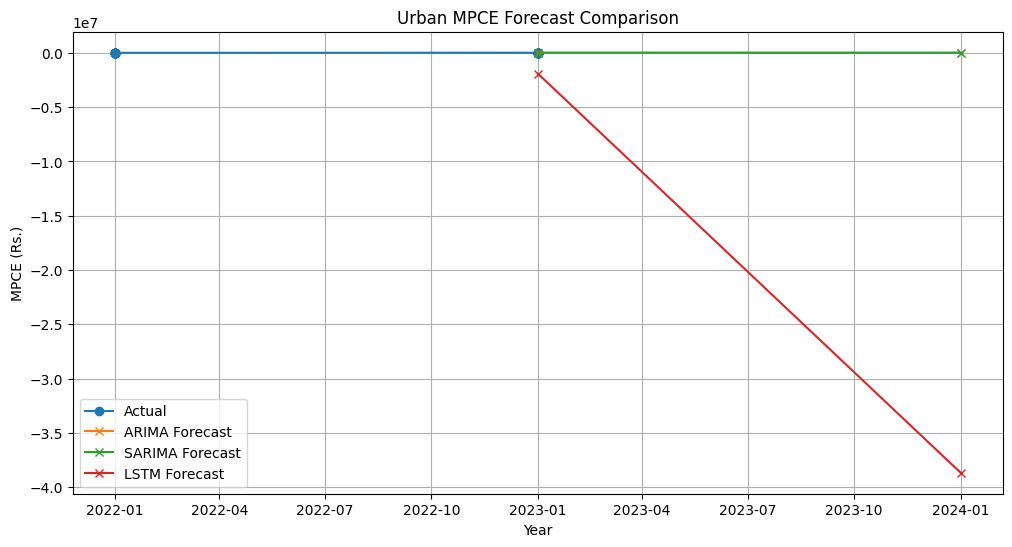

In [ ]:
def plot_forecasts(actual, forecasts, model_names, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual.values, label='Actual', marker='o')

    last_year = actual.index[-1]
    forecast_years = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=len(forecasts[0]), freq='YS')

    for i, forecast in enumerate(forecasts):
        plt.plot(forecast_years, forecast, label=f'{model_names[i]} Forecast', marker='x')

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('MPCE (Rs.)')
    plt.legend()
    plt.grid(True)
    plt.show()

model_names = ['ARIMA', 'SARIMA', 'LSTM']
rural_forecasts = [arima_rural_forecast, sarima_rural_forecast, lstm_rural_forecast]
urban_forecasts = [arima_urban_forecast, sarima_urban_forecast, lstm_urban_forecast]

plot_forecasts(rural_series, rural_forecasts, model_names, 'Rural MPCE Forecast Comparison')
plot_forecasts(urban_series, urban_forecasts, model_names, 'Urban MPCE Forecast Comparison')